In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = mnist['data'], mnist['target']

In [17]:
X.shape, y.shape

((70000, 784), (70000,))

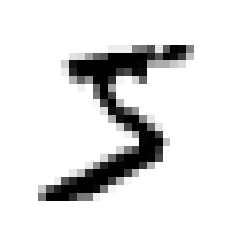

In [40]:
digit = np.array(X.iloc[0])
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [44]:
y = y.astype(np.uint8)

In [45]:
# dataset is already shuffled 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
sgd_clf = SGDClassifier(
    random_state=42
)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [52]:
sgd_clf.predict([digit])

array([ True])

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [55]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [57]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [58]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [59]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [60]:
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method='decision_function'
)

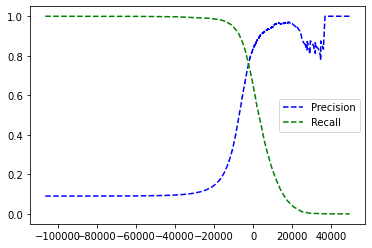

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_threshold(precisions, recalls, thesholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.legend()

plot_precision_recall_threshold(
    precisions, recalls, thresholds
)
plt.show()